In [1]:
!pip install mlxtend

  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.4-py3-none-any.whl (1.4 MB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
file_path = 'Market_Basket_Data.csv'
dataset = pd.read_csv(file_path, header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Convert dataset to list of transactions
transactions = dataset.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

# Encode transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
dataset = pd.DataFrame(te_array, columns=te.columns_)
dataset

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Apply Apriori algorithm with same parameters from the document
rules = apriori(dataset, min_support=0.004, use_colnames=True)

# Display results
print("Frequent Itemsets:")
display(rules)


Frequent Itemsets:


,support,itemsets
0,0.020397,(almonds)
1,0.008932,(antioxydant juice)
2,0.004666,(asparagus)
3,0.033329,(avocado)
4,0.004533,(babies food)
...,...,...
954,0.004933,"(chocolate, spaghetti, milk, mineral water)"
955,0.004399,"(spaghetti, milk, eggs, mineral water)"
956,0.004399,"(frozen vegetables, spaghetti, ground beef, mi..."
957,0.004533,"(frozen vegetables, spaghetti, milk, mineral w..."


In [5]:
association_rules_df = association_rules(rules, metric='confidence', min_threshold=0.3)
print("Association Rules:")
display(association_rules_df)

# Save results
rules.to_csv('frequent_itemsets.csv', index=False)
association_rules_df.to_csv('association_rules.csv', index=False)

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(almonds),(eggs),0.020397,0.179709,0.006532,0.320261,1.782108,1.0,0.002867,1.206774,0.448005,0.033747,0.171344,0.178306
1,(almonds),(mineral water),0.020397,0.238368,0.007599,0.372549,1.562914,1.0,0.002737,1.213851,0.367669,0.030255,0.176175,0.202214
2,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,1.0,0.003654,1.168147,0.325896,0.044593,0.143943,0.198329
3,(black tea),(eggs),0.014265,0.179709,0.004933,0.345794,1.924187,1.0,0.002369,1.253873,0.487250,0.026093,0.202471,0.186621
4,(black tea),(mineral water),0.014265,0.238368,0.005333,0.373832,1.568295,1.0,0.001932,1.216337,0.367609,0.021563,0.177860,0.198102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,"(spaghetti, milk, frozen vegetables)",(mineral water),0.008266,0.238368,0.004533,0.548387,2.300588,1.0,0.002562,1.686470,0.570040,0.018722,0.407046,0.283701
360,"(spaghetti, mineral water, frozen vegetables)",(milk),0.011998,0.129583,0.004533,0.377778,2.915341,1.0,0.002978,1.398885,0.664965,0.033074,0.285145,0.206379
361,"(milk, mineral water, frozen vegetables)",(spaghetti),0.011065,0.174110,0.004533,0.409639,2.352756,1.0,0.002606,1.398956,0.581400,0.025092,0.285181,0.217836
362,"(milk, spaghetti, ground beef)",(mineral water),0.009732,0.238368,0.004399,0.452055,1.896456,1.0,0.002080,1.389978,0.477346,0.018053,0.280564,0.235256


In [6]:

# Sort the rules by confidence and lift in descending order
association_rules_df = association_rules_df.sort_values(by=['confidence', 'lift'], ascending=[False, False])

In [7]:
association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
245,"(soup, frozen vegetables)",(mineral water),0.007999,0.238368,0.005066,0.633333,2.656954,1.0,0.003159,2.077178,0.628658,0.020994,0.518578,0.327293
321,"(pancakes, soup)",(mineral water),0.006799,0.238368,0.004266,0.627451,2.632276,1.0,0.002645,2.044380,0.624346,0.017709,0.510854,0.322674
339,"(tomatoes, olive oil)",(spaghetti),0.007199,0.174110,0.004399,0.611111,3.509912,1.0,0.003146,2.123717,0.720278,0.024868,0.529127,0.318190
325,"(pancakes, whole wheat rice)",(mineral water),0.006932,0.238368,0.004133,0.596154,2.500979,1.0,0.002480,1.885945,0.604346,0.017137,0.469762,0.306746
187,"(cooking oil, pancakes)",(mineral water),0.007866,0.238368,0.004666,0.593220,2.488672,1.0,0.002791,1.872345,0.602922,0.019316,0.465910,0.306398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,"(pancakes, green tea)",(spaghetti),0.016398,0.174110,0.004933,0.300813,1.727717,1.0,0.002078,1.181215,0.428223,0.026580,0.153414,0.164572
51,(soup),(milk),0.050527,0.129583,0.015198,0.300792,2.321232,1.0,0.008651,1.244861,0.599484,0.092158,0.196697,0.209038
21,(mushroom cream sauce),(escalope),0.019064,0.079323,0.005733,0.300699,3.790833,1.0,0.004220,1.316568,0.750514,0.061871,0.240450,0.186484
216,"(french fries, frozen vegetables)",(milk),0.019064,0.129583,0.005733,0.300699,2.320520,1.0,0.003262,1.244697,0.580122,0.040112,0.196591,0.172469


In [8]:
Confidence is an indication of how often the rule has been found to be true
Measures how often items in Y appear in transactions that contain X
Confidence: Transactions containing the item/total items
Number of movies the users seen / total user watch list

Support: refers to transactions containing the item / total transactions
Support: Fraction of transactions that contain an itemset


Lift: is confidence/support, refers what is the probability of likelihood the consumers will buy milk will also buy an egg, baking soda, and beer from a random new sample of the population.
So the lift is the improvement over the original prediction

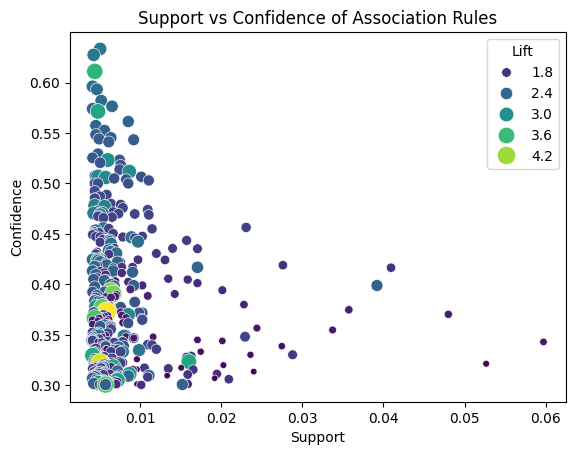

In [9]:
# Plot top 10 association rules based on support and confidence
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.figure(figsize=(10, 6))
sns.scatterplot(x=association_rules_df['support'], y=association_rules_df['confidence'], size=association_rules_df['lift'], hue=association_rules_df['lift'], palette='viridis', sizes=(20, 200))
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence of Association Rules')
plt.legend(title='Lift')
plt.show()